In [57]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 

ROC,negitive volume index,parabolic SAR


    index             datetime      open      high       low     close  \
1       1  2019-09-08 18:00:00  10000.00  10000.00  10000.00  10000.00   
2       2  2019-09-08 19:00:00  10344.77  10357.53  10337.43  10340.12   
3       3  2019-09-08 20:00:00  10340.12  10368.64  10334.54  10351.42   
4       4  2019-09-08 21:00:00  10351.42  10391.90  10324.77  10391.90   
5       5  2019-09-08 22:00:00  10392.59  10412.65  10375.58  10375.58   
..    ...                  ...       ...       ...       ...       ...   
95     95  2019-09-12 16:00:00  10327.25  10349.91  10239.42  10269.94   
96     96  2019-09-12 17:00:00  10272.72  10295.80  10266.14  10295.80   
97     97  2019-09-12 18:00:00  10295.80  10346.06  10288.08  10296.24   
98     98  2019-09-12 19:00:00  10296.88  10323.67  10272.03  10308.80   
99     99  2019-09-12 20:00:00  10301.82  10360.75  10300.85  10320.73   

     volume       ROC       NVI           SAR  Highest_high  Lowest_low  
1     0.000  0.000000  1.000000  1000

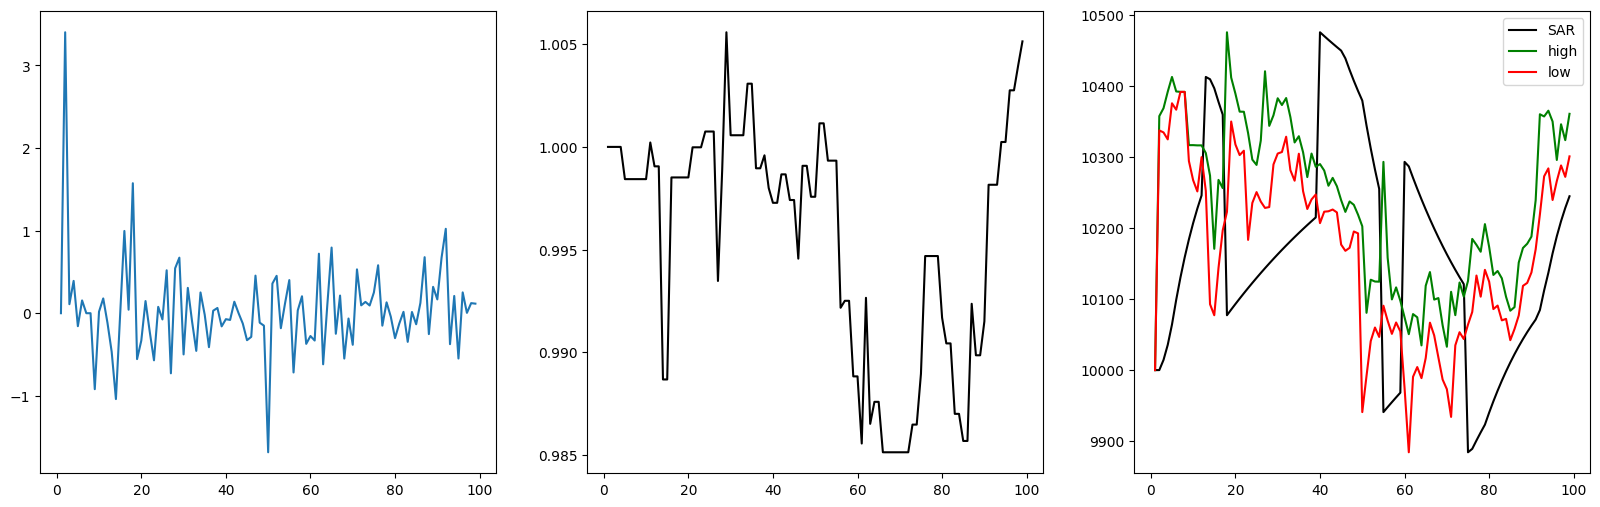

In [58]:
dataframe=pd.read_csv('btc.csv')

dataframe=dataframe[:1000]

dataframe['ROC']=0.0
dataframe['NVI']=0.0
dataframe['SAR']=0.0
dataframe['Highest_high']=0.0
dataframe['Lowest_low']=0.0

n1=1 #int(input("please give n for the no. of periods behind"))
for i in range(len(dataframe)-n1):
    dataframe.loc[i+n1,'ROC']=((dataframe.loc[i+n1,'close']-dataframe.loc[i,'close'])/dataframe.loc[i,'close'])*100

dataframe.loc[0,'NVI']=1
for i in range(len(dataframe)-1):
    if(dataframe.loc[i+1,'volume']<dataframe.loc[i,'volume']):
        dataframe.loc[i+1,'NVI']=dataframe.loc[i,'NVI']+(dataframe.loc[i+1,'close']-dataframe.loc[i,'close'])*dataframe.loc[i,'NVI']/dataframe.loc[i,'close']
    else:
        dataframe.loc[i+1,'NVI']=dataframe.loc[i,'NVI']

n2=7 #int(input("please give n for no. of periods behind"))
for i in range(len(dataframe)):
    dataframe.loc[i,'Highest_high']=dataframe['high'][max(i-n2,0):i+1].max()
    dataframe.loc[i,'Lowest_low']=dataframe['low'][max(i-n2,0):i+1].min()


dataframe.loc[0,'SAR']=dataframe.loc[0,'low']
ep=dataframe.loc[0,'high']
initial_af=0.02
af=initial_af
change_in_af=0.02
max_af=0.2
trend=1 
for i in range(len(dataframe)-1): 
    i+=1
    if (trend==1): 
        dataframe.loc[i,'SAR']=(dataframe.loc[i-1,'SAR']+af*(ep-dataframe.loc[i-1,'SAR'])) 
        if (dataframe.loc[i,'low']<dataframe.loc[i,'SAR']): 
            trend=0 
            dataframe.loc[i,'SAR']=ep 
            af=initial_af
            ep=dataframe.loc[i,'Lowest_low'] 
    else:
        dataframe.loc[i,'SAR']=(dataframe.loc[i-1,'SAR']-af*(dataframe.loc[i-1,'SAR']-ep)) 
        if (dataframe.loc[i,'high']>dataframe.loc[i,'SAR']): 
            trend=1
            dataframe.loc[i,'SAR']=ep 
            af=initial_af
            ep=dataframe.loc[i,'Highest_high'] 
    if (trend==1 and dataframe.loc[i,'high']>ep):
        ep=dataframe.loc[i,'high']
        af=min(af+change_in_af,max_af) 
    elif (trend==0 and dataframe.loc[i,'low']<ep): 
        ep=dataframe.loc[i,'low'] 
        af=min(af+change_in_af,max_af) 




subset_dataframe=dataframe.iloc[1:100]
print(subset_dataframe)

x=subset_dataframe['index']
y1=subset_dataframe['ROC']
y2=subset_dataframe['NVI']
y3=subset_dataframe['SAR']
y4=subset_dataframe['high']
y5=subset_dataframe['low']

fig, axs = plt.subplots(1,3,figsize=(20, 6))
axs[0].plot(x,y1,label='ROC')

axs[1].plot(x,y2,label='NVI',color='black')

axs[2].plot(x,y3,label='SAR',color='black')
axs[2].plot(x,y4,label='high',color='green')
axs[2].plot(x,y5,label='low',color='red')

#plt.locator_params(axis='x',nbins=100)
plt.legend()
#plt.grid(True)
plt.show()



Portfolio return percent = 40.85584514525652%
      index             datetime      open      high       low     close  \
0         0  2019-09-08 17:00:00  10000.00  10000.00  10000.00  10000.00   
1         1  2019-09-08 18:00:00  10000.00  10000.00  10000.00  10000.00   
2         2  2019-09-08 19:00:00  10344.77  10357.53  10337.43  10340.12   
3         3  2019-09-08 20:00:00  10340.12  10368.64  10334.54  10351.42   
4         4  2019-09-08 21:00:00  10351.42  10391.90  10324.77  10391.90   
...     ...                  ...       ...       ...       ...       ...   
1995   1995  2019-11-30 20:00:00   7504.35   7514.00   7468.00   7500.74   
1996   1996  2019-11-30 21:00:00   7500.74   7541.27   7499.19   7540.68   
1997   1997  2019-11-30 22:00:00   7539.96   7561.89   7528.65   7536.10   
1998   1998  2019-11-30 23:00:00   7536.00   7559.99   7531.46   7542.93   
1999   1999  2019-12-01 00:00:00   7541.08   7541.08   7460.00   7481.99   

        volume       ROC       NVI       

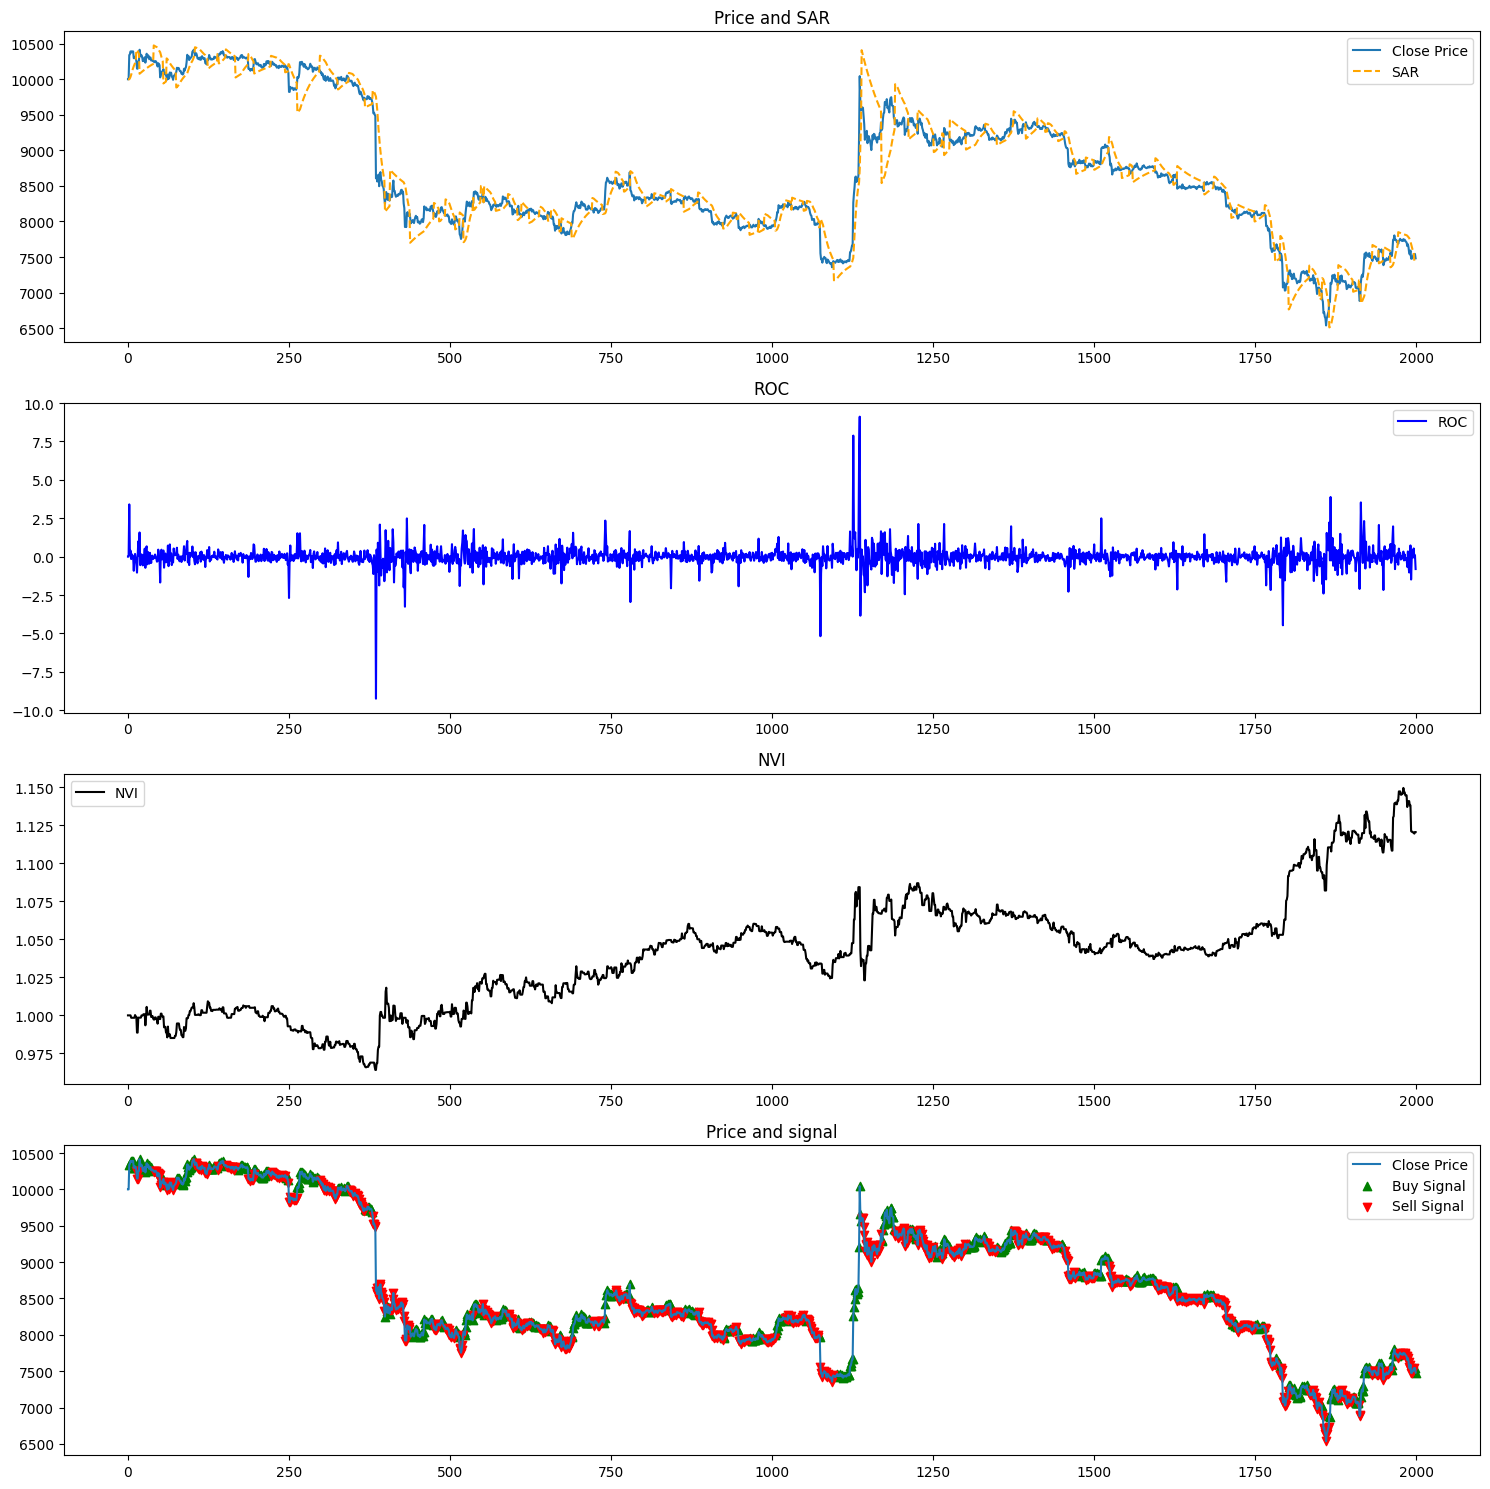

In [59]:
dataframe=pd.read_csv('btc.csv')

dataframe=dataframe[:2000]

dataframe['ROC']=0.0
dataframe['NVI']=0.0
dataframe['SAR']=0.0
dataframe['Highest_high']=0.0
dataframe['Lowest_low']=0.0
dataframe['signal']=0.0

n1=1 #int(input("please give n for the no. of periods behind"))
for i in range(len(dataframe)-n1):
    dataframe.loc[i+n1,'ROC']=((dataframe.loc[i+n1,'close']-dataframe.loc[i,'close'])/dataframe.loc[i,'close'])*100

dataframe.loc[0,'NVI']=1
for i in range(len(dataframe)-1):
    if(dataframe.loc[i+1,'volume']<dataframe.loc[i,'volume']):
        dataframe.loc[i+1,'NVI']=dataframe.loc[i,'NVI']+(dataframe.loc[i+1,'close']-dataframe.loc[i,'close'])*dataframe.loc[i,'NVI']/dataframe.loc[i,'close']
    else:
        dataframe.loc[i+1,'NVI']=dataframe.loc[i,'NVI']

n2=7 #int(input("please give n for no. of periods behind"))
for i in range(len(dataframe)):
    dataframe.loc[i,'Highest_high']=dataframe['high'][max(i-n2,0):i+1].max()
    dataframe.loc[i,'Lowest_low']=dataframe['low'][max(i-n2,0):i+1].min()


dataframe.loc[0,'SAR']=dataframe.loc[0,'low']
ep=dataframe.loc[0,'high']
initial_af=0.02
af=initial_af
change_in_af=0.02
max_af=0.2
trend=1 
for i in range(len(dataframe)-1): 
    i+=1
    if (trend==1): 
        dataframe.loc[i,'SAR']=(dataframe.loc[i-1,'SAR']+af*(ep-dataframe.loc[i-1,'SAR'])) 
        if (dataframe.loc[i,'low']<dataframe.loc[i,'SAR']): 
            trend=0 
            dataframe.loc[i,'SAR']=ep 
            af=initial_af
            ep=dataframe.loc[i,'Lowest_low'] 
    else:
        dataframe.loc[i,'SAR']=(dataframe.loc[i-1,'SAR']-af*(dataframe.loc[i-1,'SAR']-ep)) 
        if (dataframe.loc[i,'high']>dataframe.loc[i,'SAR']): 
            trend=1
            dataframe.loc[i,'SAR']=ep 
            af=initial_af
            ep=dataframe.loc[i,'Highest_high'] 
    if (trend==1 and dataframe.loc[i,'high']>ep):
        ep=dataframe.loc[i,'high']
        af=min(af+change_in_af,max_af) 
    elif (trend==0 and dataframe.loc[i,'low']<ep): 
        ep=dataframe.loc[i,'low'] 
        af=min(af+change_in_af,max_af) 


for i in range(len(dataframe)):
    if(dataframe.loc[i,'SAR']<dataframe.loc[i,'close']):
        dataframe.loc[i,'signal']=1
    if(dataframe.loc[i,'SAR']>dataframe.loc[i,'close']):
            dataframe.loc[i,'signal']=-1

investment_amount=100000
remaining_investment=investment_amount
limit_of_number_of_trades=3600
number_of_trades=0
position=0

starting_price=0
amount_of_stocks=0
for i in range(len(dataframe)):
    if(number_of_trades>limit_of_number_of_trades):
        break
    if(dataframe.loc[i,'signal']==1):
        if(position==-1):
            remaining_investment+=(starting_price-dataframe.loc[i,'close'])*amount_of_stocks
            position=0
        if(position==0):
            starting_price=dataframe.loc[i,'close']
            amount_of_stocks=remaining_investment/starting_price
            number_of_trades+=1
            position=1
    elif(dataframe.loc[i,'signal']==-1):
        if(position==1):
            remaining_investment+=(dataframe.loc[i,'close']-starting_price)*amount_of_stocks
            position=0
        if(position==0):
            starting_price=dataframe.loc[i,'close']
            amount_of_stocks=remaining_investment/starting_price
            number_of_trades+=1
            position=-1

if(position==1):
    remaining_investment+=(dataframe.loc[ len(dataframe)-1,'close']-starting_price)*amount_of_stocks
if(position==-1):
    remaining_investment+=(starting_price-dataframe.loc[len(dataframe)-1,'close'])*amount_of_stocks

portfolio_return_percent=((remaining_investment-investment_amount)/investment_amount)*100
print(f"Portfolio return percent = {portfolio_return_percent}%")
subset_dataframe=dataframe
print(subset_dataframe)

x=subset_dataframe['index']
y1=subset_dataframe['ROC']
y2=subset_dataframe['NVI']
y3=subset_dataframe['SAR']
y4=subset_dataframe['high']
y5=subset_dataframe['low']

fig, axs = plt.subplots(4, 1, figsize=(15, 15)) 
axs[0].plot(dataframe.index, dataframe['close'], label='Close Price') 
axs[0].plot(dataframe.index, dataframe['SAR'], label='SAR', linestyle='--', color='orange') 
axs[0].legend() 
axs[0].set_title('Price and SAR') 
axs[1].plot(dataframe.index, dataframe['ROC'], label='ROC', color='blue') 
axs[1].legend() 
axs[1].set_title('ROC') 
axs[2].plot(dataframe.index, dataframe['NVI'], label='NVI', color='black') 
axs[2].legend() 
axs[2].set_title('NVI') 
axs[3].plot(dataframe.index, dataframe['close'], label='Close Price') 
axs[3].scatter(dataframe.index[dataframe['signal'] == 1], dataframe['close'][dataframe['signal'] == 1], label='Buy Signal', marker='^', color='green') 
axs[3].scatter(dataframe.index[dataframe['signal'] == -1], dataframe['close'][dataframe['signal'] == -1], label='Sell Signal', marker='v', color='red')
axs[3].legend() 
axs[3].set_title('Price and signal') 

plt.tight_layout() 
plt.show()

